<a href="https://colab.research.google.com/github/KUNTZ-ROMUALD/Izzi-learn-Backend/blob/master/ProjetChurnCustumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Construction d'un modèle de machine learning pour prédire le désabonnement des clients de Tunisie Telecom**


**Installation et importation des bibliothèques nécessaire**

In [19]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install ipywidgets
!pip install matplotlib
!pip install scikit-learn

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact,interactive,fixed,interact_manual
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE




**Importation des données**

In [21]:
data = pd.read_csv("data_test_telecom.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Analyse des données** : cette première va nous permettre de savoir traitement appliquer à nos données pour un bon entrainement

1. Détermination du problème de machine learning: à partir des données nous pouvons dire que c’est un problème de classification on a plusieurs inputs et un output qui prend deux valeurs 1 ou 0 donc nous avons un problème de classification binaire

2. Comprendre les données : nombre de colonne, nombre d'élément par colonne, type de chaque colonne

In [22]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Nous pouvons observer si le type des colonnes reflète bien la réalité. C'est le cas de TotalCharges qui est normalement de type numérique mais dans notre dataset il est de type object.

3. Voir le nomre de valeur unique que nous avons par colonne

In [23]:
data.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


4. Voir les colonnes qui posèdent des valeurs nulles

In [24]:
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Analyse exploratoire**

Le nombre de valeur unique nous permis de voir le nombre de variable catégorielle que nous avons et ceux ci possédent des valeurs inférieures à 5

---



In [25]:
#Selection des variables catégorielle
categorical_colums = data.nunique()[data.nunique()<5].keys().to_list()
categorical_colums


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Visualisation graphique de la distrubition de chaque variable


In [26]:
#fonction permettant de construire un digramme en barre pour chaque variable
def bar_diagramm(categorical_var):
  data[categorical_var].value_counts(normalize=True).plot(kind='bar')
  plt.ylabel('proportion')
  plt.title("Distribution of "+ str(categorical_var))
  return plt.show()

In [27]:
#Interact
interact(bar_diagramm,categorical_var=categorical_colums)

interactive(children=(Dropdown(description='categorical_var', options=('gender', 'SeniorCitizen', 'Partner', '…

<function __main__.bar_diagramm(categorical_var)>

Observation :
1. on plus de clients qui se sont désabonnés(70%) dans notre dataset
2. la distribution des presque égale entre les sexes
3. on plus de jeune que de vieux
4.
5.

**Cas de variables numériques**

In [28]:
#Changement de type de la colonne TotalCharges en type numérique
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')
#data['TotalChargs']=data['TotalCharges'].replace('',np.nan).astype(flaot)

#suppression de la colonne customerID
data=data.drop(columns=['customerID'])
#Selection des variables numérique
numerical_vars=data.nunique()[data.nunique()>5].keys().to_list()
numerical_vars
#fonction

['tenure', 'MonthlyCharges', 'TotalCharges']

In [29]:
#fonction permettant de construire un digramme en barre pour chaque variable
def historigram(nv):
  sns.displot(data[nv],kde=False)
  plt.title("histogram of " + str(nv))
  return plt.show()


In [30]:
interact(historigram,nv=numerical_vars)

interactive(children=(Dropdown(description='nv', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='…

<function __main__.historigram(nv)>

Nous vérifions le coefficient d'asymétrie de la variable ' TotalCharges

In [31]:
data['TotalCharges'].skew()

np.float64(0.961642499724251)

nous remarquons que ce coefficient est très élevé ce qui n'est pas normal ou pseudo normal, nous devons transformer cette variables pour la rendre beaucoup plus symetrique

Nous contruire un boite à moustache pour regarder les valeurs abérantes

In [32]:
#Creation d'une fonction de construction de boites à moustaches de manière interactive
def box_lot(val):
  sns.boxplot(y=data[val])
  plt.title("box plot of "+ str(val))
  return plt.show()

#interact
interact(box_lot,val=numerical_vars)

interactive(children=(Dropdown(description='val', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value=…

<function __main__.box_lot(val)>

Nous remarquons ces variables numériques ne contiennent pas de valeurs abérantes mais neamoins elles sont très assymetrique ce qui peut poser un problème au niveau de l'entrainement des modèles.
nous devons appliquer des fonctions de transformation à ces variables pour les rendre symétrique

Une fois cette analyse de distribution terminée nous allons faire une analyse bivariées

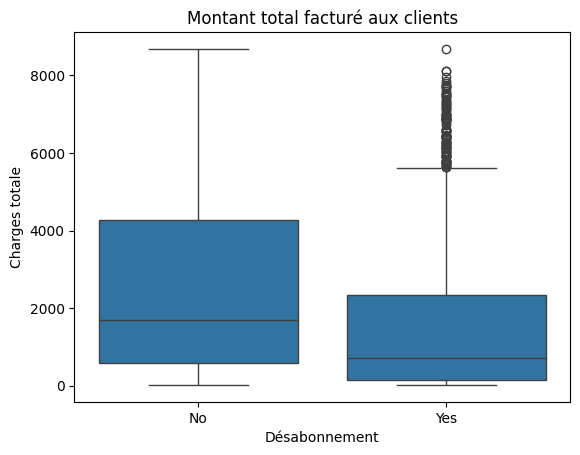

In [33]:
#TotalCharges vs Churn
sns.boxplot(x='Churn',y='TotalCharges',data=data)
plt.xlabel('Désabonnement')
plt.ylabel('Charges totale')
plt.title('Montant total facturé aux clients')
plt.show()



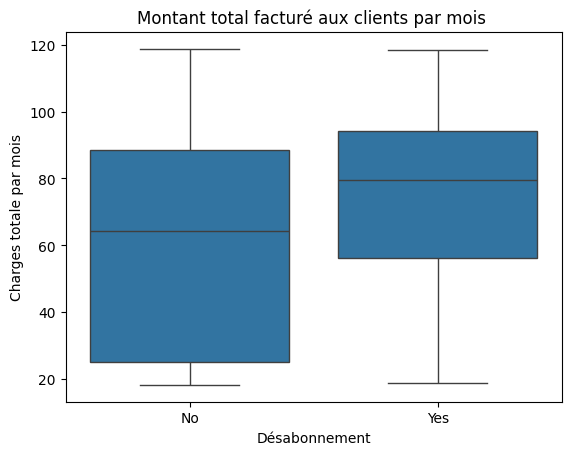

In [34]:
#MonthlyCharges vs Churn
sns.boxplot(x='Churn',y='MonthlyCharges',data=data)
plt.xlabel('Désabonnement')
plt.ylabel('Charges totale par mois')
plt.title('Montant total facturé aux clients par mois ')
plt.show()


Nous pouvons constater que le montant total facturé par les clients désabonnés est plus élevé que les clients abonnés. c'est un factueur à regarder de plus près par l'entreprise car cet indicateur qui peut être fortement lié au désabonnement

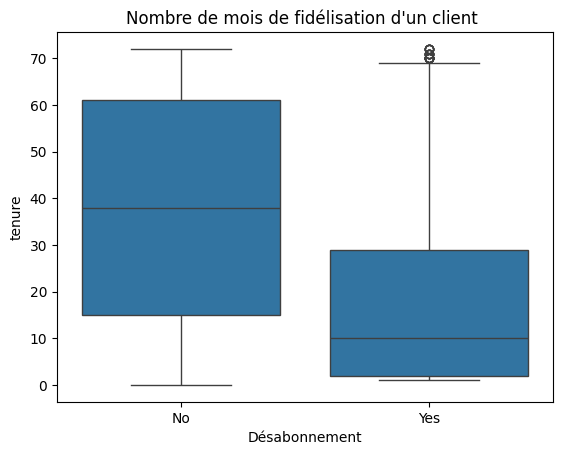

In [35]:
#tenure vs Churn
sns.boxplot(x='Churn',y='tenure',data=data)
plt.xlabel('Désabonnement')
plt.title("Nombre de mois de fidélisation d'un client ")
plt.show()


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

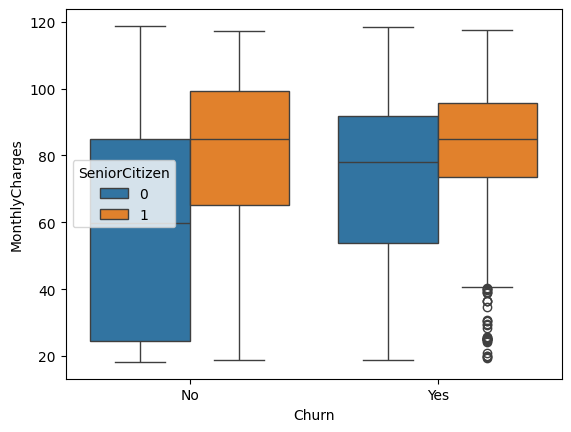

In [36]:
#MonthlyCharges vs churn by SeniorCitizen
sns.boxplot(x='Churn',y='MonthlyCharges',data=data,hue='SeniorCitizen')

Nous remarquons que les personnes âgées sont les plus facturer

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

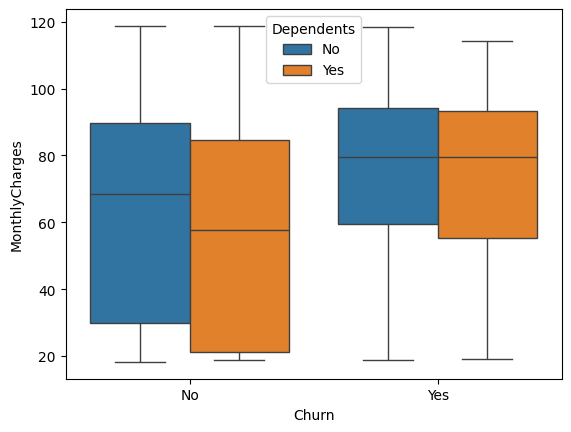

In [37]:
#MonthlyCharges vs churn by Dependents
sns.boxplot(x='Churn',y='MonthlyCharges',data=data,hue='Dependents')

D'autre analyse être encore explorer
mais pouvons aussi faire un résumé statistique


In [38]:
#résumé statistique
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Nous voyons ici voir la nécessité de standardiser ou normaliser ces variables car elles possèdent des intervals large ceci peut compromettre l'entrainement de nos modèles

**Pre-traitement des données**

In [39]:
#Création d'une copie du dataFrame original
df=data.copy()

Gestion des valeurs manquantes

In [40]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Ici compte tenu de la quantité de valeurs manquantes et de quantités de données de notre dataset nous allons choisir la suppression des valeurs manquantes  

In [41]:
#Suppression des valeurs manquantes
df.dropna(inplace=True)

#vérification
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Encodage des variables categorielles

In [42]:
#Encodage de la variables gender
df['gender']=df['gender'].apply(lambda row: 1 if row == 'female' else 0)

#Recuperations des variables binaire qui ont pour valeurs yes ou no
binary_colunms=df.drop('gender',axis=1).nunique()[df.drop('gender',axis=1).nunique()<3].keys().to_list()
binary_colunms




['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [43]:
  for colunm in binary_colunms :
    df[colunm]=df[colunm].apply(lambda row: 1 if row =='Yes' else 0)
  df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [44]:
#Encodage des variables restantes
remining_cat_vars=df[categorical_colums].nunique()[df[categorical_colums].nunique()>2].keys().to_list()

remining_cat_vars_dumies=pd.get_dummies(df[remining_cat_vars],columns=remining_cat_vars,drop_first=True,dtype=int)



In [45]:
#nouveau dataFrame
df=pd.concat([df['gender'],df[binary_colunms],remining_cat_vars_dumies,df[numerical_vars]],axis=1)

In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,29.85,29.85
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,34,56.95,1889.50
2,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,2,53.85,108.15
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,1,0,2,70.70,151.65


In [47]:
df.shape

(7032, 31)

**Tranformer les variables TotalCharges qui etait très asymétrique en appliquant une focntion racine carrée**

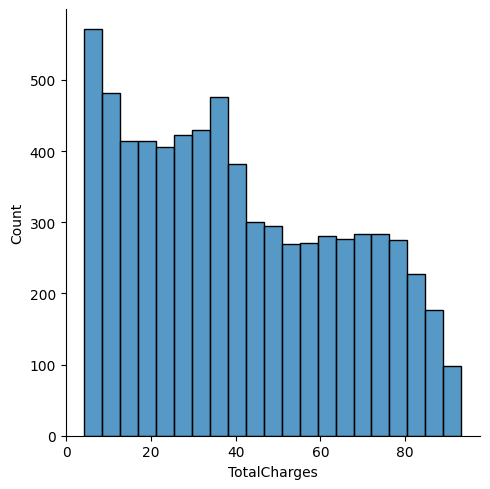

In [48]:
#Transformation de la variable TotalCharges

df['TotalCharges']=np.sqrt(df['TotalCharges'])

#Visualisation de la variable transformée
sns.displot(df['TotalCharges'],kde=False)

In [49]:
#Nouveau coefficient d'asymétrie
df['TotalCharges'].skew()

np.float64(0.3089261418986736)

**Division de notre dataset en données entrainement 60%, de test 20% et de validation 20%**

In [50]:
#Données de d'entrainement, de test et de validation
x=df.drop('Churn',axis=1)
y=df['Churn']
seed=123

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=seed,stratify=y)

x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=seed,stratify=y_test)

In [51]:
#Vérification des frequence de classes dans la variable y
pd.DataFrame(y).value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


In [52]:
#Vérification des frequence de classes dans la variable y_train
pd.DataFrame(y_train).value_counts(normalize=True)

,proportion
Churn,
0,0.734297
1,0.265703


In [53]:
#Vérification des frequence de classes dans la variable y_val
pd.DataFrame(y_val).value_counts(normalize=True)

,proportion
Churn,
0,0.733997
1,0.266003


In [54]:
#Vérification des frequence de classes dans la variable y_test
pd.DataFrame(y_test).value_counts(normalize=True)

,proportion
Churn,
0,0.734186
1,0.265814


Désequilibre des classes de données :
Dans nore cas on plus de 73% de personnes qui n'ont pas résilié leur abonnement contre 25% qui ont résiliés. On a donc un désequilible de classes. Nous allons rééchantillonner  les classes pour créer léquilible. nous allons faire le sur-échantillonage et le sous échantillonage

In [55]:
#Résolution de problème de deséquilible des classes : le sur-échantillonage de la classe minoritaire
x2=x_train
x2['Churn']=y_train.values

minority= x2[x2.Churn == 1]

majority=x2[x2.Churn == 0]

minority_upsampled=resample(minority,replace=True,n_samples=len(majority),random_state=seed)

upsampled=pd.concat([majority,minority_upsampled])

upsampled


,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
5624,0,0,1,0,1,1,0,1,1,0,...,1,0,0,0,0,0,62,89.80,75.030327,0
6827,0,0,1,1,1,1,0,0,0,0,...,1,0,0,1,0,0,60,79.05,68.289091,0
2309,0,0,0,0,1,1,0,1,1,0,...,0,0,1,1,0,0,57,90.45,72.317356,0
6291,0,0,0,0,1,0,0,1,0,0,...,1,1,0,1,0,0,59,79.85,69.181645,0
3036,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,67,49.35,57.631155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,0,0,0,0,1,1,0,1,1,0,...,1,0,0,0,1,0,41,113.20,68.479924,1
6986,0,0,1,0,1,1,0,1,1,0,...,0,0,0,1,0,0,30,94.10,52.957058,1
5134,0,0,0,0,1,1,0,1,1,0,...,0,0,0,0,1,0,15,80.20,34.889110,1
3349,0,0,1,0,1,1,0,1,1,0,...,1,0,0,0,1,0,11,99.50,32.510767,1


In [56]:
#Vérification

upsampled['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.5
1,0.5


In [57]:
#Données d'entrainement sur la base du sur-échantillonnage
x_train_up=upsampled.drop('Churn',axis=1)
y_train_up=upsampled['Churn']

In [58]:
#Résolution de problème de deséquilible des classes : le sous-échantillonage de la classe majoritaire

minority_dwsampled=resample(majority,replace=False,n_samples=len(minority),random_state=seed)

dwsampled=pd.concat([minority,minority_dwsampled])

dwsampled

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
3725,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,1,70.80,8.414274,1
6597,0,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,7,70.75,21.232051,1
3779,0,0,1,1,1,0,0,1,0,0,...,0,0,1,1,0,0,66,79.40,71.795543,1
2208,0,0,1,0,1,1,0,1,1,0,...,1,0,0,0,1,0,1,100.80,10.039920,1
2894,0,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,48,60.35,53.818213,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0,0,1,1,1,1,0,1,0,1,...,0,0,1,0,0,1,39,23.80,30.063267,0
244,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,13,54.80,27.042559,0
6635,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,1,24,20.10,23.106276,0
2568,0,0,1,1,1,0,0,0,0,1,...,0,0,1,0,0,1,15,19.35,16.698802,0


In [59]:
dwsampled['Churn'].value_counts(normalize=True)

,proportion
Churn,
1,0.5
0,0.5


In [60]:
#Données d'entrainement sur la base du sous-échantillonnage
x_train_down=dwsampled.drop('Churn',axis=1)
y_train_down=dwsampled['Churn']

In [61]:
# x_train et y_train
y_train=x_train['Churn']
x_train=x_train.drop('Churn',axis=1)


In [62]:
#Définiton des données d'entrainement
#Choix possible : (x_train,y_train),(x_train_up,y_train_up), (x_train_down,y_train_down)
train_feautures=x_train_up
train_labels=y_train_up

**Normalisation des données**

In [63]:
#Normalisation des variables indépendantes
scaler=MinMaxScaler()
mod_scaler=scaler.fit(train_feautures)
train_feautures=mod_scaler.transform(train_feautures)
x_val=mod_scaler.transform(x_val)
x_test= mod_scaler.transform(x_test)

#Retransformer les résultats en dataFrame
train_feautures=pd.DataFrame(train_feautures,columns=x.columns)
x_val=pd.DataFrame(x_val,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)

In [64]:
#Toutes les valeurs sont comprise entre 0 et 1
train_feautures.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
count,6196.0,6196.0,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,...,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,0.0,0.0,0.438186,0.258393,0.907844,0.640090,0.092156,0.424629,0.524855,0.166720,...,0.166720,0.402679,0.164461,0.168980,0.183021,0.413977,0.210458,0.371739,0.492968,0.375041
std,0.0,0.0,0.496204,0.437786,0.289270,0.480012,0.289270,0.494326,0.499422,0.372756,...,0.372756,0.490477,0.370723,0.374764,0.386715,0.492584,0.407667,0.338247,0.286558,0.276117
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042254,0.272637,0.128144
50%,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281690,0.560199,0.330415
75%,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.661972,0.718408,0.592084
max,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Modélisation**

In [65]:
  #Selection des meilleurs varibles prédictrice
  rf=RandomForestClassifier()
  rf.fit(train_feautures,train_labels)
  #affichage du rapport de classification qui permet de visualiser les différents métriques

  print(classification_report(y_val,rf.predict(x_val)))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1032
           1       0.58      0.56      0.57       374

    accuracy                           0.78      1406
   macro avg       0.71      0.71      0.71      1406
weighted avg       0.77      0.78      0.77      1406



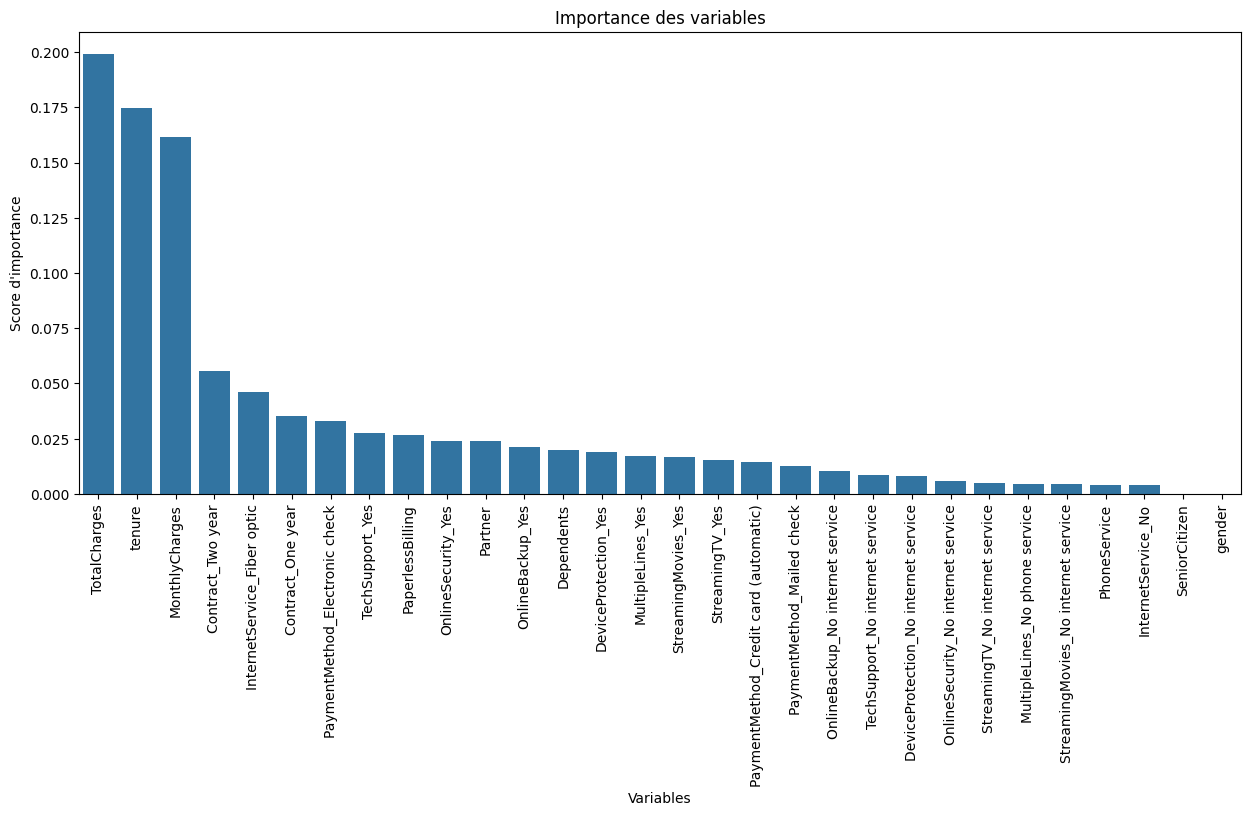

In [66]:
#Traçage du graphe pour voir l'importance des variables independates
plt.figure(figsize=(15,6))
vars_imp= pd.Series(rf.feature_importances_,index=train_feautures.columns).sort_values(ascending=False)
sns.barplot(x=vars_imp.index,y=vars_imp)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Score d'importance")
plt.title("Importance des variables")
plt.show()

In [67]:
  #Afficharge des variables avec leurs importances
  vars_imp

,0
TotalCharges,0.199122
tenure,0.174814
MonthlyCharges,0.161662
Contract_Two year,0.055546
InternetService_Fiber optic,0.046039
Contract_One year,0.035387
PaymentMethod_Electronic check,0.033149
TechSupport_Yes,0.027762
PaperlessBilling,0.026718
OnlineSecurity_Yes,0.024023


In [68]:
#selection des variables pour l'algorithme  donc l'importance est supérieur à un seuil
seuil=0.004

vars_selected=vars_imp[vars_imp>seuil].index.to_list()
train_feautures=train_feautures[vars_selected]
x_val=x_val[vars_selected]
x_test=x_test[vars_selected]

In [69]:
#Nombre de variable prédictrices
len(train_feautures.columns)

28

**Modèle de regression logistion**

In [70]:
#Dictionnaire des hyperparamètres
param_grid={'C':[00.001,00.01,1,10,50,500]}

#GridSearchCV
grid_logreg_class=GridSearchCV(estimator=LogisticRegression(random_state=seed,max_iter=500),
                               param_grid=param_grid,
                               scoring='f1',
                               cv=5)
#Entrainement de l'algorithme
logreg_model=grid_logreg_class.fit(train_feautures,train_labels)

#Meilleur score et hyperparamètre
print(round(logreg_model.best_score_,3))
print(logreg_model.best_estimator_)



0.774
LogisticRegression(C=1, max_iter=500, random_state=123)


**Evaluation du modèle**

In [71]:
#Fonction d'évaluation du modèle
def model_evaluation(model,features,labels):
  pred=model.predict(features)
  print(classification_report(labels,pred))

In [72]:
#Evaluation du modèle de regression logistique

model_evaluation(logreg_model,x_val,y_val)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1032
           1       0.53      0.78      0.63       374

    accuracy                           0.75      1406
   macro avg       0.71      0.76      0.72      1406
weighted avg       0.80      0.75      0.77      1406



  Appliquons l'algorithme Recusive Feature Eliminator (RFE) sur le modèle pour voir s'il garde les performances lorsqu'on réduit le nombre variables prédictives

In [73]:
#Création d'une fonction de construction d'un modèle avec l'utilisation de l'algorithme de RFE
def model_with_rfe(model):
  rfe_model= RFE(estimator=model,verbose=0)
  rfe_model.fit(train_feautures,train_labels)
  mask=rfe_model.support_
  reduced_X=train_feautures.loc[:,mask]
  print(reduced_X.columns)
  return rfe_model

In [74]:
rfe_logreg_model=model_with_rfe(logreg_model.best_estimator_)
rfe_logreg_model

Index(['TotalCharges', 'tenure', 'Contract_Two year',
       'InternetService_Fiber optic', 'Contract_One year',
       'PaymentMethod_Electronic check', 'TechSupport_Yes', 'PaperlessBilling',
       'OnlineSecurity_Yes', 'MultipleLines_Yes', 'StreamingMovies_Yes',
       'StreamingTV_Yes', 'DeviceProtection_No internet service',
       'StreamingMovies_No internet service'],
      dtype='object')


RFE(estimator=LogisticRegression(C=1, max_iter=500, random_state=123))

In [75]:
#Evaluation du modèle de regression logistique avec RFE
model_evaluation(rfe_logreg_model,x_val,y_val)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1032
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1406
   macro avg       0.71      0.76      0.72      1406
weighted avg       0.80      0.75      0.76      1406



La RFE a réduit le nombre de prédicteur de 28 à 14 et n'a pas amélioré la performance du modèle

**Modèle de Forêt aléatoire**

In [76]:
#Dictionnaire des hyperparamètres
param_grid_rf={'n_estimators':[10,50,100,500,1000],'max_depth':[3,5,10,None]}

#GreadseachCV
grid_rf_class=GridSearchCV(estimator=RandomForestClassifier(random_state=seed),param_grid=param_grid_rf,scoring='f1',cv=5)


#Entrainement de l'algorithme
model_rf=grid_rf_class.fit(train_feautures,train_labels)

#Meilleur score et hyperparamètre
print(round(model_rf.best_score_,3))
print(model_rf.best_estimator_)

0.91
RandomForestClassifier(n_estimators=500, random_state=123)


In [77]:
#Evaluation du modèle de forêt aléatoire
model_evaluation(model_rf.best_estimator_,x_val,y_val)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1032
           1       0.60      0.59      0.59       374

    accuracy                           0.78      1406
   macro avg       0.72      0.72      0.72      1406
weighted avg       0.78      0.78      0.78      1406



Comparé au modèle de regression logistique, le modèle de forêt aléatoire semble moins performant.

Appliquons le RFE au modèle de forêt aléatoire

In [78]:
#Random forêt avec RFE
model_rf_rfe=model_with_rfe(model_rf.best_estimator_)
model_rf_rfe


Index(['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Two year',
       'InternetService_Fiber optic', 'Contract_One year',
       'PaymentMethod_Electronic check', 'TechSupport_Yes', 'PaperlessBilling',
       'OnlineSecurity_Yes', 'Partner', 'OnlineBackup_Yes', 'Dependents',
       'OnlineSecurity_No internet service'],
      dtype='object')


RFE(estimator=RandomForestClassifier(n_estimators=500, random_state=123))

In [79]:
#Evaluation du modèle de forêt alèatoire avec RFE
model_evaluation(model_rf_rfe,x_val,y_val)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1032
           1       0.59      0.58      0.58       374

    accuracy                           0.78      1406
   macro avg       0.72      0.72      0.72      1406
weighted avg       0.78      0.78      0.78      1406



Nous povons conster que le modèle est moins performant avec la méthode RFE

**Classificateur Perceptron Multicouche**

In [80]:
#MLPClassifier
mlp= MLPClassifier(random_state=seed,max_iter=1000)
parameters={'hidden_layer_sizes':[(50,),(100,),(200,)],
           # 'activation':['identity', 'logistic', 'tanh', 'relu'],
            'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp_cv=GridSearchCV(estimator=mlp,param_grid=parameters,scoring='f1',cv=5,n_jobs=-1)

model_mlp=mlp_cv.fit(train_feautures,train_labels)


In [81]:
#Meilleur score et hyperparamètre
model_mlp


#Evaluation du modèle de perceptron

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=123),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(50,), (100,), (200,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']},
             scoring='f1')

In [82]:
round(model_mlp.best_score_,3)

np.float64(0.846)

In [83]:
model_mlp.best_params_

{'hidden_layer_sizes': (200,), 'learning_rate': 'constant'}

In [84]:
#Evaluation du modèle de Perceptron
model_evaluation(model_mlp,x_val,y_val)

              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1032
           1       0.51      0.67      0.58       374

    accuracy                           0.74      1406
   macro avg       0.69      0.72      0.70      1406
weighted avg       0.77      0.74      0.75      1406



Juqu'à présent c'est la regression logistique qui est le meilleur modèle

**Support Vector Machine**

In [85]:
#Support vector machine
svm_model=SVC(random_state=seed)
svm_hyperparam={'C':[0.01,1.0,10],'kernel':['linear','rbf']}

#GridSeachCV
svm_grid_model=GridSearchCV(estimator=svm_model,param_grid=svm_hyperparam,scoring='f1',cv=5)

#Entrainement

svm_grid_model.fit(train_feautures,train_labels)

#Meilleur score et hyperparamètre
print(round(svm_grid_model.best_score_,3))
print(svm_grid_model.best_params_)

0.827
{'C': 10, 'kernel': 'rbf'}


In [86]:
print(round(svm_grid_model.best_score_,3))
print(svm_grid_model.best_estimator_)
print(svm_grid_model.best_params_)

0.827
SVC(C=10, random_state=123)
{'C': 10, 'kernel': 'rbf'}


In [87]:
#Evaluation du modèle
model_evaluation(svm_grid_model.best_estimator_,x_val,y_val)

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1032
           1       0.50      0.71      0.59       374

    accuracy                           0.74      1406
   macro avg       0.69      0.73      0.70      1406
weighted avg       0.78      0.74      0.75      1406



**Conclusion**

Nous dans les étapes précédentes utilisé les données d'évaluation pour selectionner le meilleur modèle. Nous allons évaluer notre meilleur modèle avec les données tests

In [88]:
#Performance du meilleur modèle sur les données tests
model_evaluation(logreg_model,x_test,y_test)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1033
           1       0.55      0.78      0.64       374

    accuracy                           0.77      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.81      0.77      0.78      1407

